In [1]:
import pandas as pd
import numpy as ps


In [2]:

model=pd.read_csv("data2.csv")
model

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [3]:

model.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [4]:
model.info()
model['labels'] = model['class'].map({
    0: "HATE SPEECH",
    1: "offensive language",  # Corrected the typo here
    2: "No hate or offensive"
})

model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,offensive language


In [5]:
data=model[["tweet","labels"]]

data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


In [6]:
import re 
import nltk
import string

print(nltk.data.path)

['C:\\Users\\hasit/nltk_data', 'c:\\Users\\hasit\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data', 'c:\\Users\\hasit\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data', 'c:\\Users\\hasit\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data', 'C:\\Users\\hasit\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [7]:
#impporting stop words
from nltk.corpus import stopwords
stopwords=set(stopwords.words("english"))
stem= nltk.SnowballStemmer("english")

In [8]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Intialization NLTK's stopwords and stemmer
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def clean_data(text):
    # Convert text to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove square brackets and their contents
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    
    # Remove newline characters
    text = text.replace('\n', ' ')
    
    # Tokenize the text into words
    words = text.split()
    
    # Remove stop words and perform stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    # Join the cleaned and stemmed words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text


In [9]:
data['tweet']=data['tweet'].apply(clean_data)
data

x=ps.array(data["tweet"])
y=ps.array(data["labels"])
x


C:\Users\hasit\AppData\Local\Temp\ipykernel_20720\3056937691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']=data['tweet'].apply(clean_data)


array(['rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       'rt mleew17 boy dat coldtyga dwn bad cuffin dat hoe 1st place',
       'rt urkindofbrand dawg rt 80sbaby4lif ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin di',
       'youu got wild bitch tellin lie',
       'ruffl ntac eileen dahlia beauti color combin pink orang yellow amp white coll'],
      dtype=object)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [11]:
cvname=CountVectorizer()
x= cvname.fit_transform(x)

x

<24783x33202 sparse matrix of type '<class 'numpy.int64'>'
	with 212390 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [13]:
x_train

<16604x33202 sparse matrix of type '<class 'numpy.int64'>'
	with 142371 stored elements in Compressed Sparse Row format>

In [14]:
x_test

<8179x33202 sparse matrix of type '<class 'numpy.int64'>'
	with 70019 stored elements in Compressed Sparse Row format>

In [15]:
#Making our ml model
from sklearn.tree import DecisionTreeClassifier



In [16]:


# Create a Decision Tree Classifier
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(x_test)


In [17]:
from sklearn.metrics import confusion_matrix
cn  = confusion_matrix(y_test, y_pred)

In [18]:
cn

array([[ 154,   43,  268],
       [  39, 1195,  145],
       [ 261,  245, 5829]], dtype=int64)

In [19]:
import seaborn as ans 
import matplotlib.pyplot as ply 
%matplotlib inline


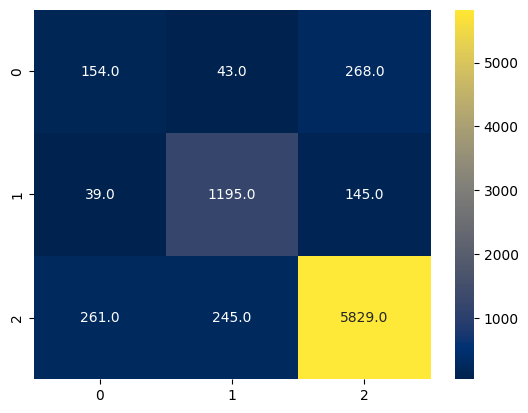

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated the confusion matrix 'cn'
# Correct the function call as follows:
sns.heatmap(cn, annot=True, fmt=".1f", cmap='cividis')

# Show the heatmap
plt.show()


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8776134001711701

In [22]:
demo=" What would y'all lil ugly bald headed bitches do if they stop making make-up &amp; weave"
demo=clean_data(demo)
demo

'would yall lil ugli bald head bitch stop make makeup amp weav'

In [23]:
Demo_data=cvname.transform({demo}).toarray()
Demo_data


array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
print("prediction of sampled text is ")
dt.predict(Demo_data)

prediction of sampled text is 


array(['offensive language'], dtype=object)